In [28]:
%run Medium1.ipynb

nadh_c + succoa_c --> coa_c + h_c + nad_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
akg_c --> co2_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
0.8769972144270062
0.876997214426983
0.7171259713406638
0.7171259713406452
Max. BDO production [mmol gDW^-1 h^-1]: 7.851508771929817
Theoretical max. yield [mmol-BDO / mmol-xyl]: 0.7851508771929817
Max. BDO production [mmol gDW^-1 h^-1]: 7.935035460992907
Theoretical max. yield [mmol-BDO / mmol-xyl]: 0.7935035460992907


# Loopless FBA

In [29]:
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba

In [30]:
model_akg.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_xyl__D_e': 10,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

In [31]:
model_sucd.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

In [50]:
model_akg.objective=model_akg.reactions.ADH
nominal = model_akg.optimize()
loopless = loopless_solution(model_akg)

In [51]:
import pandas
df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

<AxesSubplot:title={'center':'Akg Model'}, xlabel='loopless', ylabel='nominal'>

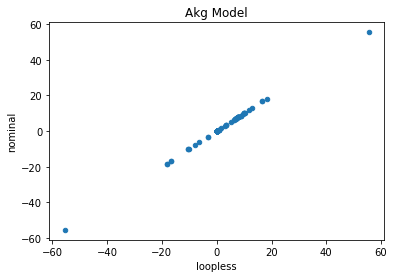

In [52]:
df.plot.scatter(x='loopless', y='nominal', title='Akg Model')

In [59]:
solution1 = pfba(model_akg)
print("parsimonious solution: status = " + solution1.status)
print("loopless solution flux: ADH = %.4f" % solution1.fluxes["ADH"], "mmol/(gdw*h)")

parsimonious solution: status = optimal
loopless solution flux: ADH = 7.9350 mmol/(gdw*h)


In [56]:
model_sucd.objective=model_sucd.reactions.ADH
nominal = model_sucd.optimize()
loopless = loopless_solution(model_sucd)

<AxesSubplot:title={'center':'Sucd Model'}, xlabel='loopless', ylabel='nominal'>

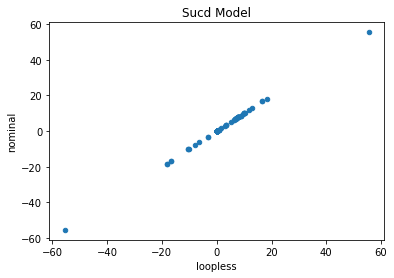

In [57]:
df.plot.scatter(x='loopless', y='nominal', title='Sucd Model')

In [58]:
solution2 = pfba(model_sucd)
print("parsimonious solution: status = " + solution2.status)
print("loopless solution flux: ADH = %.4f" % solution2.fluxes["ADH"], "mmol/(gdw*h)")

parsimonious solution: status = optimal
loopless solution flux: ADH = 9.6059 mmol/(gdw*h)
